In a 16x16 grid, select by hand the parameters of a two hidden layer MLP with signum units (threshold nonlinearity) with two inputs and one output to mimic the space partition shown in Fig. 1 (assume that the center of the figure is (0,0)). State the smallest number of hidden units the network needs in each layer and explain their role in creating the mask. Assume that black is -1 and white is 1 (or 0 and 1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[-8, -8] -> 1
[-8, -7] -> -1
[-8, -6] -> -1
[-8, -5] -> -1
[-8, -4] -> -1
[-8, -3] -> -1
[-8, -2] -> -1
[-8, -1] -> -1
[-8, 0] -> -1
[-8, 1] -> -1
[-8, 2] -> -1
[-8, 3] -> -1
[-8, 4] -> -1
[-8, 5] -> -1
[-8, 6] -> -1
[-8, 7] -> -1
[-8, 8] -> -1
[-7, -8] -> 1
[-7, -7] -> 1
[-7, -6] -> 1
[-7, -5] -> -1
[-7, -4] -> -1
[-7, -3] -> -1
[-7, -2] -> -1
[-7, -1] -> -1
[-7, 0] -> -1
[-7, 1] -> -1
[-7, 2] -> -1
[-7, 3] -> -1
[-7, 4] -> -1
[-7, 5] -> -1
[-7, 6] -> -1
[-7, 7] -> -1
[-7, 8] -> -1
[-6, -8] -> -1
[-6, -7] -> -1
[-6, -6] -> 1
[-6, -5] -> 1
[-6, -4] -> 1
[-6, -3] -> -1
[-6, -2] -> -1
[-6, -1] -> -1
[-6, 0] -> -1
[-6, 1] -> -1
[-6, 2] -> -1
[-6, 3] -> -1
[-6, 4] -> -1
[-6, 5] -> -1
[-6, 6] -> -1
[-6, 7] -> -1
[-6, 8] -> -1
[-5, -8] -> -1
[-5, -7] -> -1
[-5, -6] -> -1
[-5, -5] -> -1
[-5, -4] -> 1
[-5, -3] -> 1
[-5, -2] -> 1
[-5, -1] -> -1
[-5, 0] -> -1
[-5, 1] -> -1
[-5, 2] -> -1
[-5, 3] -> -1
[-5, 4] -> -1
[-5, 5] -> -1
[-5, 6] -> -1
[-5, 7] -> -1
[-5, 8] -> -1
[-4, -8] -> -1
[-4, -7] ->

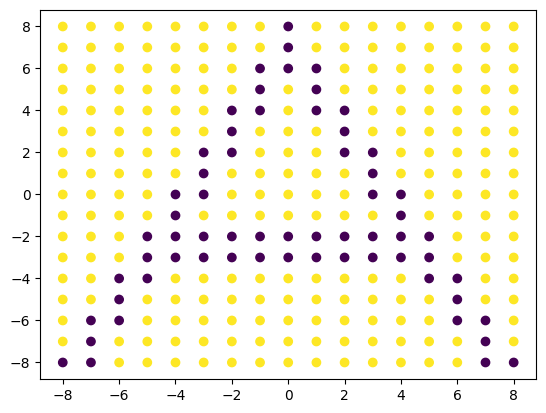

In [174]:
# with a 16x16 grid,
# we can create the following layers to get
# 1 output node from an mlp with 2 hidden layers
# we know that there need's to be at least 6 neurons to draw the A, as we see in the figure I drew (image0.webp).
# we can make the second layer represent each stroke of A (there are 3)

# create a 2d array of 0s

output_data = []

def neg_sign(x):
    return 1 if x > 0 else -1

# loop through
for x_1 in np.arange(-8, 9, 1):
    for x_2 in np.arange(-8, 9, 1):
        v_1 = np.sign(8 + (2 * x_1) - x_2)
        v_2 = np.sign(8 - (2 * x_1)- x_2)
        v_3 = np.sign(6 - (2 * x_1) - x_2)
        v_4 = np.sign(6 + (2 * x_1) - x_2)
        v_5 = np.sign(-3 + (0 * x_1) - x_2)
        v_6 = np.sign(-2 + (0 * x_1) - x_2)

        z_1 = np.sign((v_1 - v_4) + v_2/2 - 1)
        z_2 = np.sign((v_2 - v_3) + v_1/2 - 1)
        z_3 = np.sign((v_6 - v_5) +  v_1/2 + v_2/2 - 1)

        output = neg_sign(z_1 + z_2 + z_3 + 2)

        output_data.append([x_1, x_2, output])

        print(f"[{x_1}, {x_2}] -> {output}")


# plot the A_empty, with range -8 to 8
# plot the results
plt.scatter([x[0] for x in output_data], [x[1] for x in output_data], c=[-x[2] for x in output_data])


Can you achieve the same goal with a single hidden layer network? Justify your answer.

Yes, Single-hidden layer neural networks already possess a universal representation property: by increasing the number of hidden neurons, they can fit (almost) arbitrary functions. You can't get more than this. And particularly not by adding more layers.

Epoch 0, Loss: 0.3938968948309489
Epoch 1000, Loss: 0.24972614786416378
Epoch 2000, Loss: 0.2492214120900127
Epoch 3000, Loss: 0.2463454751881688
Epoch 4000, Loss: 0.21951161194853
Epoch 5000, Loss: 0.17489678746224632
Epoch 6000, Loss: 0.1689347341764805
Epoch 7000, Loss: 0.16779658761925462
Epoch 8000, Loss: 0.16738219722726688
Epoch 9000, Loss: 0.1671781643826819
Epoch 10000, Loss: 0.1670597374214493
Epoch 11000, Loss: 0.1669834983327104
Epoch 12000, Loss: 0.1669307786738204
Epoch 13000, Loss: 0.16689236652251413
Epoch 14000, Loss: 0.16686324622780807
Epoch 15000, Loss: 0.16684047424552823
Epoch 16000, Loss: 0.1668222177363496
Epoch 17000, Loss: 0.16680727968885306
Epoch 18000, Loss: 0.16679484717934953
Epoch 19000, Loss: 0.1667843498641339
Epoch 20000, Loss: 0.16677537643119494
Epoch 21000, Loss: 0.16676762318303878
Epoch 22000, Loss: 0.1667608612542481
Epoch 23000, Loss: 0.16675491506271178
Epoch 24000, Loss: 0.16674964776330228
Epoch 25000, Loss: 0.16674495119592794
Epoch 26000, 

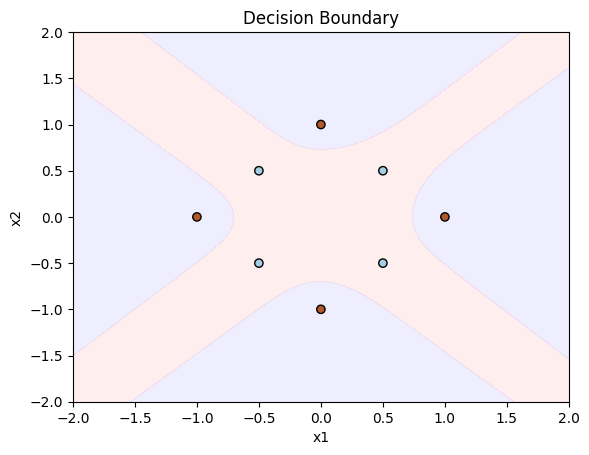

In [192]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the training data (STAR problem)
X = np.array([[1, 0],
              [0, 1],
              [-1, 0],
              [0, -1],
              [0.5, 0.5],
              [-0.5, 0.5],
              [0.5, -0.5],
              [-0.5, -0.5]])

# Corresponding labels
y = np.array([[1], [1], [1], [1], [0], [0], [0], [0]])

# Initialize parameters
input_layer_neurons = 2   # Number of input neurons (x1 and x2)
hidden_layer_neurons = 5  # Number of hidden neurons 
output_neurons = 1        # Output neuron (binary classification)

# Randomly initialize weights and biases
np.random.seed(1)
W1 = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
b1 = np.random.uniform(size=(1, hidden_layer_neurons))
W2 = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
b2 = np.random.uniform(size=(1, output_neurons))

# Hyperparameters
learning_rate = .1
epochs = 100000  # Number of training iterations

activation_function = 'sigmoid'

# Training the MLP using backpropagation
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = X @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_output @ W2 + b2
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    W2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    b2 += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Optionally print loss at intervals
    if epoch % 1000 == 0:
        loss = np.mean(np.square(y - predicted_output))
        print(f'Epoch {epoch}, Loss: {loss}')

# After training, display the final predictions
print("Final predicted output: ")
print(predicted_output)

# Plot the decision boundary
# Define the range for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid to pass through the network
grid = np.c_[xx.ravel(), yy.ravel()]

# Perform forward propagation on the grid data
hidden_layer_input = grid @ W1 + b1
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = hidden_layer_output @ W2 + b2
predicted_output_grid = sigmoid(output_layer_input)

# Reshape the output to match the grid shape
Z = predicted_output_grid.reshape(xx.shape)

# Plot the contour where output is 0.5
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['#FFAAAA', '#AAAAFF'])

# Plot the training data
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired, edgecolors='k')

plt.title('Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()



Is there one possible solution (i.e. a single set of parameters) to exactly separate the two classes of given points? 

- No there are infinitely many solutions, and it's not even close as there is not enough data to create a close to a perfect line consistently

Now that you know the location of the decision regions that shatter the data, augment the input data set to make the performance of the MLP more robust, and with faster training. Show experimentally the improvement.

Epoch 0, Loss: 0.4435889024570748
Epoch 1000, Loss: 0.08902666903991749
Epoch 2000, Loss: 0.0020646898563543617
Epoch 3000, Loss: 0.0009205408178978298
Epoch 4000, Loss: 0.0005508634245095836
Epoch 5000, Loss: 0.0003875694008402112
Epoch 6000, Loss: 0.00029816937117069383
Epoch 7000, Loss: 0.00024146229222457962
Epoch 8000, Loss: 0.00020157158959006847
Epoch 9000, Loss: 0.00017132810669094213
Epoch 10000, Loss: 0.00014703319165584142
Epoch 11000, Loss: 0.00012667977682540626
Epoch 12000, Loss: 0.00010933110421773961
Epoch 13000, Loss: 9.47552110341071e-05
Epoch 14000, Loss: 8.29890497726262e-05
Epoch 15000, Loss: 7.39166639616636e-05
Epoch 16000, Loss: 6.692407880655511e-05
Epoch 17000, Loss: 6.132083713965073e-05
Epoch 18000, Loss: 5.6683987915079365e-05
Epoch 19000, Loss: 5.276038263314603e-05
Epoch 20000, Loss: 4.938426358185641e-05
Epoch 21000, Loss: 4.644053826471286e-05
Epoch 22000, Loss: 4.384594870899018e-05
Epoch 23000, Loss: 4.153833103324099e-05
Epoch 24000, Loss: 3.94700822

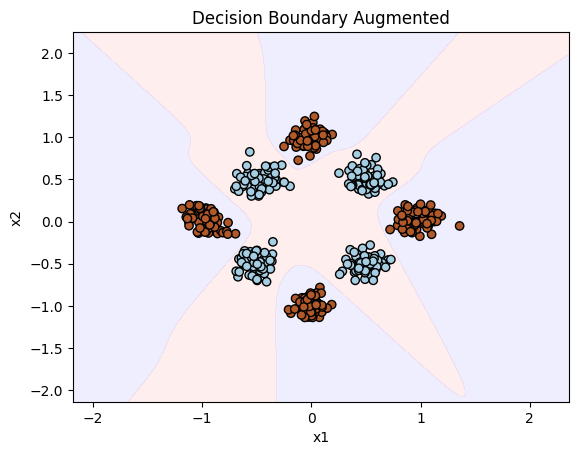

In [203]:
# 1000 new augmented points by adding Gaussian noise
num_augmented_points = 500
X_augmented = np.vstack([X + np.random.normal(0, 0.1, X.shape) for _ in range(num_augmented_points // len(X))])

# augment labels (same as original labels, just replicated)
y_augmented = np.vstack([y for _ in range(num_augmented_points // len(y))])

# combine the original and augmented data
X_aug = np.vstack((X, X_augmented))
y_aug = np.vstack((y, y_augmented))

# Initialize parameters
input_layer_neurons = 2   # Number of input neurons (x1 and x2)
hidden_layer_neurons = 6  # Number of hidden neurons 
output_neurons = 1        # Output neuron (binary classification)

# Randomly initialize weights and biases
np.random.seed(1)
W1 = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
b1 = np.random.uniform(size=(1, hidden_layer_neurons))
W2 = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
b2 = np.random.uniform(size=(1, output_neurons))

# Hyperparameters
learning_rate = .1
epochs = 100000  # Number of training iterations

activation_function = 'sigmoid'

# Training the MLP using backpropagation
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = X_aug @ W1 + b1
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = hidden_layer_output @ W2 + b2
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = y_aug - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating Weights and Biases
    W2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    b2 += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    W1 += X_aug.T.dot(d_hidden_layer) * learning_rate
    b1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Optionally print loss at intervals
    if epoch % 1000 == 0:
        loss = np.mean(np.square(y_aug - predicted_output))
        print(f'Epoch {epoch}, Loss: {loss}')

# After training, display the final predictions
print("Final predicted output: ")
print(predicted_output)

# Plot the decision boundary
# Define the range for the grid
x_min, x_max = X_aug[:, 0].min() - 1, X_aug[:, 0].max() + 1
y_min, y_max = X_aug[:, 1].min() - 1, X_aug[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid to pass through the network
grid = np.c_[xx.ravel(), yy.ravel()]

# Perform forward propagation on the grid data
hidden_layer_input = grid @ W1 + b1
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = hidden_layer_output @ W2 + b2
predicted_output_grid = sigmoid(output_layer_input)

# Reshape the output to match the grid shape
Z = predicted_output_grid.reshape(xx.shape)

# Plot the contour where output is 0.5
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['#FFAAAA', '#AAAAFF'])

# Plot the training data
plt.scatter(X_aug[:, 0], X_aug[:, 1], c=y_aug.ravel(), cmap=plt.cm.Paired, edgecolors='k')

plt.title('Decision Boundary Augmented')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Decision boundary looks similar, but in this case it's more precise as now the data isn't in a perfect star pattern. So the model fit it more closely. To get the X shape like the prior graph, I added another node in the hidden layer to provide it with more info to train properly. 